<center><h1><strong>WeRateDogs Data Wrangling</strong></h1></center>

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#WeRateDogs-Data-Wrangling" data-toc-modified-id="WeRateDogs-Data-Wrangling-1"><strong>WeRateDogs Data Wrangling</strong></a></span></li><li><span><a href="#Introduction" data-toc-modified-id="Introduction-2">Introduction</a></span></li><li><span><a href="#1.-Gathering" data-toc-modified-id="1.-Gathering-3">1. Gathering</a></span><ul class="toc-item"><li><span><a href="#1.1-The-WeRateDogs-Twitter-Archive" data-toc-modified-id="1.1-The-WeRateDogs-Twitter-Archive-3.1">1.1 The WeRateDogs Twitter Archive</a></span></li><li><span><a href="#1.2-The-Tweet-image-predictions" data-toc-modified-id="1.2-The-Tweet-image-predictions-3.2">1.2 The Tweet image predictions</a></span></li><li><span><a href="#1.3-Twitter-API" data-toc-modified-id="1.3-Twitter-API-3.3">1.3 Twitter API</a></span></li><li><span><a href="#1.4-Gathering-Output" data-toc-modified-id="1.4-Gathering-Output-3.4">1.4 Gathering Output</a></span></li></ul></li><li><span><a href="#2.-Assessing-the-Data" data-toc-modified-id="2.-Assessing-the-Data-4">2. Assessing the Data</a></span><ul class="toc-item"><li><span><a href="#2.1-Twitter-Archive" data-toc-modified-id="2.1-Twitter-Archive-4.1">2.1 Twitter Archive</a></span></li><li><span><a href="#2.2-Tweet-Image-Predictions" data-toc-modified-id="2.2-Tweet-Image-Predictions-4.2">2.2 Tweet Image Predictions</a></span></li><li><span><a href="#2.3-Twitter-API" data-toc-modified-id="2.3-Twitter-API-4.3">2.3 Twitter API</a></span></li><li><span><a href="#2.4-Assessing-Output" data-toc-modified-id="2.4-Assessing-Output-4.4">2.4 Assessing Output</a></span></li></ul></li><li><span><a href="#3.-Cleaning" data-toc-modified-id="3.-Cleaning-5">3. Cleaning</a></span><ul class="toc-item"><li><span><a href="#3.1-Twitter-Archive" data-toc-modified-id="3.1-Twitter-Archive-5.1">3.1 Twitter Archive</a></span></li><li><span><a href="#3.2-Tweet-Image-Predictions" data-toc-modified-id="3.2-Tweet-Image-Predictions-5.2">3.2 Tweet Image Predictions</a></span></li><li><span><a href="#3.3-Twitter-API" data-toc-modified-id="3.3-Twitter-API-5.3">3.3 Twitter API</a></span></li><li><span><a href="#3.4-Merging-Data" data-toc-modified-id="3.4-Merging-Data-5.4">3.4 Merging Data</a></span></li><li><span><a href="#3.5-Storing-Data" data-toc-modified-id="3.5-Storing-Data-5.5">3.5 Storing Data</a></span></li></ul></li><li><span><a href="#4.-Data-Analysis-and-Visualization" data-toc-modified-id="4.-Data-Analysis-and-Visualization-6">4. Data Analysis and Visualization</a></span><ul class="toc-item"><li><span><a href="#4.1-Analyzing-the-image-predictions-DataFrame" data-toc-modified-id="4.1-Analyzing-the-image-predictions-DataFrame-6.1">4.1 Analyzing the image predictions DataFrame</a></span></li><li><span><a href="#4.2-Analyzing-the-twitter-archive-data-and-the-prediction-level-1" data-toc-modified-id="4.2-Analyzing-the-twitter-archive-data-and-the-prediction-level-1-6.2">4.2 Analyzing the twitter archive data and the prediction level 1</a></span></li></ul></li></ul></div>

# Introduction

This project started as an assessment for the **Udacity Data Analysis Professional Track**.

The dataset is the tweet archive of Twitter user [@dog_rates](https://twitter.com/dog_rates), also known as 
[WeRateDogs](https://en.wikipedia.org/wiki/WeRateDogs). WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. These ratings almost always have a denominator of 10. The numerators, though? Almost always greater than 10. 11/10, 12/10, 13/10, etc. Why? Because ["they're good dogs Brent."](https://knowyourmeme.com/memes/theyre-good-dogs-brent) WeRateDogs has over 4 million followers and has received international media coverage.

<center><img width="50%" src ="dog-rates-social.jpg"/></center>

The data wrangling process was achieved using python and the following packages (Libraries):

- [NumPy](https://numpy.org/)
- [Panadas](https://pandas.pydata.org/)
- [Requests](https://requests.readthedocs.io/en/master/)
- [Tweepy](https://www.tweepy.org/)
- [json](https://docs.python.org/3/library/json.html)


# 1. Gathering

Three sources of data were gathered for this Project:
1. Twitter acrhive provided by WeRateDogs
2. Image predictions from the neural network data downloaded programatically.
3. Information from the Twitter API scraped programatically.

We begin by importing the required libraries and packages that will help us in our data wranglling and analysis

In [1]:
#import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.dates as mdates
import seaborn as sns
import os
import requests
import tweepy
import json
import re

## 1.1 The WeRateDogs Twitter Archive

- The 'twitter-archive-enhanced.csv' file was provided by Udacity and downloaded manually.
- Then it was easily read into a pandas DataFrame named `df_archive`.

In [2]:
df_archive = pd.read_csv('twitter-archive-enhanced.csv')
df_archive.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None


## 1.2 The Tweet image predictions

- The 'image-predictions.tsv' shows the results of a neural network that detects what breed of dog (or other object, animal, etc.) is present in each tweet.   
- The file was downloaded programmatically using the Requests python library and then saved to a local file.
- The file name was extracted from the url using the split function.
- The file was then read into a pandas DataFrame `df_pred` while specifying that it's a tsv by setting the `sep` parameter to `'\t'`.

In [72]:
pred_url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
file_name = pred_url.split('/')[-1]

# only download the file if the file doesn't already exist on disk.
if os.path.exists(file_name):
    print(f"File {file_name} already exists")
else:
    r = requests.get(pred_url)
    # write the reponse to a local file
    with open('image-predictions.tsv','wb') as file:
        file.write(r.content)
        print(f"successfully downloaded {file_name} and written to disc")

File image-predictions.tsv already exists


In [73]:
# Read the image predictions file into a DataFrame
df_pred = pd.read_csv('image-predictions.tsv',sep='\t')
df_pred.sample(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
651,682003177596559360,https://pbs.twimg.com/media/CXb2RcDUsAEnkJb.jpg,1,triceratops,0.249872,False,chimpanzee,0.060929,False,mask,0.050221,False
1709,818145370475810820,https://pbs.twimg.com/media/C1qi26rW8AMaj9K.jpg,1,golden_retriever,0.621931,True,Labrador_retriever,0.364997,True,redbone,0.003971,True
1397,768193404517830656,https://pbs.twimg.com/media/Cqkr0wiW8AAn2Oi.jpg,1,lion,0.396984,False,ram,0.300851,False,cheetah,0.094474,False


## 1.3 Twitter API 

- A Twitter Developer account was created and used to qurey more data using the tweet ids from the `df_archive` DataFrame.
- The Twitter API was used to query each tweet's JSON data using Python's Tweepy library and stored each tweet's entire set of JSON data as a line in a file called tweet_json.txt file.
- The 'tweet._json.txt' file line by line into a pandas DataFrame `df_api` with the following columns:
    - tweet ID.
    - retweet count. 
    - favorite count. 

- Note: Twitter API keys, secrets, and tokens were read from an external file and were not submitted with the project.

In [74]:
tweet_ids = df_archive['tweet_id']
json_file = 'tweet_json.txt'


# only Query the API if the tweet_json.txt file doesn't exist
if os.path.exists(json_file):
    print(f"File {json_file} already exists")
else:
    # import the keys files where the API keys are stored and it is not submitted with the project
    import keys
    # Twitter API authorization 
    auth = tweepy.OAuthHandler(keys.consumer_key, keys.consumer_secret)
    auth.set_access_token(keys.access_token, keys.access_secret)

    api = tweepy.API(auth)
    
    count = 0
    fails_dict = {}
    # Save each tweet's returned JSON as a new line in a .txt file
    with open(json_file, 'w') as outfile:
        # Loop through each tweet and write its information into a separate line of the .txt file
        for tweet_id in tweet_ids:
            count += 1
            print(str(count) + ": " + str(tweet_id))
            try:
                tweet = api.get_status(tweet_id, tweet_mode='extended')
                print("Success")
                json.dump(tweet._json, outfile)
                outfile.write('\n')
            except tweepy.TweepError as e:
                print("Fail")
                fails_dict[tweet_id] = e
                pass
    print(f"File {json_file} successfully written to Disk")
    print("Some tweets returned the following errors")
    print(fails_dict)



File tweet_json.txt already exists


In [76]:
# read .txt file line by line into a pandas DataFrame

labels = ['tweet_id','retweet_count','favorite_count']

df_api = pd.DataFrame(columns=labels)

with open(json_file) as file:
    for line in file:
        data = json.loads(line)
        df_api = df_api.append({
            'tweet_id':data['id'],
            'retweet_count':data['retweet_count'],
            'favorite_count':data['favorite_count']
            },ignore_index=True)
        
df_api.sample(5)

,tweet_id,retweet_count,favorite_count
259,841077006473256960,5124,22292
603,796116448414461957,2403,9062
266,840268004936019968,5543,18798
18,888554962724278272,3059,18093
868,759557299618865152,1166,4606


## 1.4 Gathering Output
 
The three files were successfully downloaded, written to a local file and read into the following pandas DataFrames:
- `df_archive`:  Data from the WeRateDogs Twitter archive.
- `df_pred`:  Data from the image predictions from the neural network.
- `df_api`:  Data scraped from the Twitter API.


# 2. Assessing the Data

We start assessing the data to try to find any Quality or tidiness issues. 

The aim is to asses all three DataFrames with respect to Quality dimensions:
 - Completeness
 - Validity
 - Accuracy
 - Consistency
 
and the following tidiness rules:
- Each variable forms a column.
- Each observation forms a row.
- Each type of observational unit forms a table.

## 2.1 Twitter Archive

using the `info` method we try to find missing data and look to see if we have non-original tweets (retweets and replies). Also check the is we already have the correct data types for all columns.

In [77]:
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [8]:
df_archive.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2223,668297328638447616,NaN,NaN,2015-11-22 05:17:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",2 rare dogs. They waddle (v inefficient). Some...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668297328...,9,10,None,None,None,None,None
1550,689154315265683456,NaN,NaN,2016-01-18 18:36:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We normally don't rate birds but I feel bad co...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/689154315...,9,10,None,None,None,None,None
1326,706153300320784384,NaN,NaN,2016-03-05 16:24:01 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This is Layla. She's giving you a standing ova...,NaN,NaN,NaN,https://vine.co/v/iXidJXBJ3P9,13,10,Layla,None,None,None,None
2175,669214165781868544,NaN,NaN,2015-11-24 18:01:05 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jaspers. He is a northeastern Gillette...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669214165...,10,10,Jaspers,None,None,None,None
1278,708853462201716736,NaN,NaN,2016-03-13 03:13:29 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This is Lucy. She doesn't understand fetch. 8/...,NaN,NaN,NaN,https://vine.co/v/iHl2UDEBZ95,8,10,Lucy,None,None,None,None


In [9]:
# check for duplicated entries
sum(df_archive['tweet_id'].duplicated())

0

It si clear that we have 181 tweets that are retweets and 78 tweets that are replies. That means these are not original tweets and will need to be filtered out.

Now let's check the ratings columns.

In [78]:
df_archive['rating_denominator'].value_counts().keys()

Int64Index([10, 11, 50, 80, 20, 2, 16, 40, 70, 15, 90, 110, 120, 130, 150, 170,
            7, 0],
           dtype='int64')

In [79]:
df_archive[df_archive['rating_denominator'] != 10].sample(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,None,None,None
2335,666287406224695296,NaN,NaN,2015-11-16 16:11:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an Albanian 3 1/2 legged Episcopalian...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666287406...,1,2,an,None,None,None,None
1635,684222868335505415,NaN,NaN,2016-01-05 04:00:18 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Someone help the girl is being mugged. Several...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/684222868...,121,110,None,None,None,None,None


In [80]:
df_archive['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

The rating denominator was not always equal to 10 and also the rating numerator had some inconsistent values either too small or too large. After examining the data set by filtering the illogical and exploring both their text and their images, it was deduced that the reasons for the issues in these ratings were:
- The ratings of pack of dogs is added together making the denominator multiples of 10.
- The extraction process assumed that '/' character only appears once in the text and that it always indicates rating which was found not to be true.


In [81]:
df_archive['name'].value_counts()

None       745
a           55
Charlie     12
Lucy        11
Oliver      11
          ... 
Joshwa       1
Darby        1
Harnold      1
Arlen        1
Bauer        1
Name: name, Length: 957, dtype: int64

In [14]:
names = df_archive['name'].value_counts().keys()
not_names = []

for name in names:
    if name.islower() or len(name) < 2:
        not_names.append(name)
print(not_names)

['a', 'the', 'an', 'very', 'one', 'quite', 'just', 'not', 'actually', 'mad', 'getting', 'officially', 'incredibly', 'O', 'all', 'his', 'life', 'light', 'by', 'old', 'my', 'such', 'unacceptable', 'space', 'infuriating', 'this']


The name column has a lot of missing values that are indicated as "None" in a string format.
Also, it contained a lot of words that should not be considered names. that probably happened because the extraction process assumed that names only and must come after the words "this is" which is not always true. 

In [15]:
df_archive[['doggo','floofer','pupper','puppo']].value_counts()

doggo  floofer  pupper  puppo
None   None     None    None     1976
                pupper  None      245
doggo  None     None    None       83
None   None     None    puppo      29
doggo  None     pupper  None       12
None   floofer  None    None        9
doggo  floofer  None    None        1
       None     None    puppo       1
dtype: int64

- The dog stages columns ('doggo', 'flooofer', 'pupper', 'puppo') are values and not variables. They all represent different dog stages. They should be one column instead.
- Some entries has more than one dog stage:
    - 12 entry has both doggo and pupper.
    - 1 entry has both doggo and floofer.
- Missing values are written as "None" in a string format instead on nulls.

In [16]:
df_archive['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

The 'source' column contains the whole HTML 'a' tag while the source is only the inner text of the tag.

## 2.2 Tweet Image Predictions

In [82]:
df_pred.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1176,737678689543020544,https://pbs.twimg.com/media/CjzC2oGWYAAyIfG.jpg,1,Pembroke,0.935307,True,Cardigan,0.049874,True,Chihuahua,0.011603,True
1610,801167903437357056,https://pbs.twimg.com/media/Cx5R8wPVEAALa9r.jpg,1,cocker_spaniel,0.740220,True,Dandie_Dinmont,0.061604,True,English_setter,0.041331,True
59,667119796878725120,https://pbs.twimg.com/media/CUIV6F7XIAA1tAM.jpg,1,Pembroke,0.741563,True,Chihuahua,0.057866,True,toy_poodle,0.039125,True
1855,841314665196081154,https://pbs.twimg.com/ext_tw_video_thumb/84131...,1,Afghan_hound,0.903712,True,Saluki,0.035215,True,bloodhound,0.026565,True
2045,886366144734445568,https://pbs.twimg.com/media/DE0BTnQUwAApKEH.jpg,1,French_bulldog,0.999201,True,Chihuahua,0.000361,True,Boston_bull,0.000076,True


In [18]:
sum(df_pred['tweet_id'].duplicated())

0

In [83]:
df_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [20]:
df_pred['img_num'].value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

- prediction levels are separated in different columns while they actually all represent one variable "prediction_level" 
- Even though some tweets have more than one image but no duplicates were found.

## 2.3 Twitter API

In [21]:
df_api

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7461,35352
1,892177421306343426,5537,30593
2,891815181378084864,3664,23025
3,891689557279858688,7637,38647
4,891327558926688256,8228,36916
...,...,...,...
1527,666049248165822465,39,95
1528,666044226329800704,124,264
1529,666033412701032449,39,108
1530,666029285002620928,41,118


In [22]:
df_api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1532 entries, 0 to 1531
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        1532 non-null   object
 1   retweet_count   1532 non-null   object
 2   favorite_count  1532 non-null   object
dtypes: object(3)
memory usage: 36.0+ KB


- The 'retweet_count' and 'favorite_count' columns have the wrong datatype. 
- The index column here is the same as the `df_archive` DataFrame and they should be merged together.

## 2.4 Assessing Output

After the data was assessed both visually and programmatically, The following issues were concluded:

### Quality

#### Completeness: 
do we have all of the records that we should? Do we have missing records or not? Are there specific rows, columns, or cells missing?

`df_archive`
- 'expanded_urls' have missing values. that means they don't have image information.

`df_api`
- The API query failed to retrieve data for 25 tweets because they are either no longer available or access is denied.


#### Validity: 
we have the records, but they're not valid, i.e., they don't conform to a defined schema. A schema is a defined set of rules for data. These rules can be real-world constraints (e.g. negative height is impossible) and table-specific constraints (e.g. unique key constraints in tables).

`df_archive`

- The 'is_reply_status_id' and 'retweeted_status_id' columns have non null values showing that 181 entries are retweets and 78 entries are replies. i.e; not original retweets.
- Also 'expanded_urls' have missing values which means they don't contain images.

#### Accuracy: 
inaccurate data is wrong data that is valid. It adheres to the defined schema, but it is still incorrect. Example: a patient's weight that is 5 lbs too heavy because the scale was faulty.

`df_archive`

- the 'name' column has some values that are not actual name. such as:  
'a', 'the', 'an', 'very', 'one', 'quite', 'just', 'mad', 'actually', 'getting', 'not', 'infuriating', 'space', 'unacceptable', 'his', 'old', 'O', 'life', 'this', 'incredibly', 'such', 'light', 'officially', 'all', 'by', 'my'.
- 12 entries have both lables 'doggo' and 'pupper'
- 1 entry have both labels 'doggo' and 'floofer

#### Consistency: 
inconsistent data is both valid and accurate, but there are multiple correct ways of referring to the same thing. Consistency, i.e., a standard format, in columns that represent the same data across tables and/or within tables is desired.

`df_archive`
- not all 'rating_denominator' values are 10.
- The 'rating_numerator' column has some very low or very large values.
- 'timestamp' and 'retweeted_status_timestamp' column is has type of srting. should be datetime.
- the 'source' column values are the complete 'a' tag. Should be reduced to only be actual source values:  
    iPhone, Vine, Web Client and TweetDeck
- The 'name' columns missing values are labeled 'None'.

`df_api`
- the 'tweet_id', 'retweet_count' and 'favorite_count' are of type string. Should be integers.


### Tidiness

`df_archive`
- The dog stages columns ('doggo', 'flooofer', 'pupper', 'puppo') should be one column instead.

`df_pred`
- Multiple predictions exist in the same row. the doesn't follow the tidiness rule 'every row is an observation'. Each prediction should be its own row instead.

`df_api`
- The observation row here is the tweet defined by the 'tweet_id' that is the same as in `df_archive`. The two tables should be one table instead. 

# 3. Cleaning

## 3.1 Twitter Archive

In [84]:
#Copying the original DataFrame into a new one to be cleaned
df_archive_clean = df_archive.copy()

#### Define
* Convert the 'timestamp' and 'retweeted_status_timestamp' columns from string to datetime using the `pd.to_datetime` function.

#### Code

In [85]:
df_archive_clean['timestamp'] = pd.to_datetime(df_archive_clean['timestamp'])
df_archive_clean['retweeted_status_timestamp'] = pd.to_datetime(df_archive_clean['retweeted_status_timestamp'])

#### Test

In [86]:
# check that the 'timestamp' and 'retweeted_status_timestamp' columns are changed to datetime
df_archive_clean[['timestamp','retweeted_status_timestamp']].dtypes

timestamp                     datetime64[ns, UTC]
retweeted_status_timestamp    datetime64[ns, UTC]
dtype: object

#### Define

* Remove all tweets that are not original tweets, i.e; tweets that are retweets or replies. So, the `df_archive_clean` is filtered to only the rows where the columns 'retweeted_status_id' and 'in_reply_to_status_id' are null values.

#### Code

In [87]:
df_archive_clean = df_archive_clean[df_archive_clean['retweeted_status_id'].isnull()]
df_archive_clean = df_archive_clean[df_archive_clean['in_reply_to_status_id'].isnull()]

#### Test

In [88]:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2097 non-null   int64              
 1   in_reply_to_status_id       0 non-null      float64            
 2   in_reply_to_user_id         0 non-null      float64            
 3   timestamp                   2097 non-null   datetime64[ns, UTC]
 4   source                      2097 non-null   object             
 5   text                        2097 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      datetime64[ns, UTC]
 9   expanded_urls               2094 non-null   object             
 10  rating_numerator            2097 non-null   int64           

#### Define

- Remove the rows with empty 'expanded_urls'. These are the tweets that don't have image information.

#### Code

In [89]:
df_archive_clean = df_archive_clean[df_archive_clean['expanded_urls'].notna()]

#### Test

In [90]:
sum(df_archive_clean['expanded_urls'].isnull())

0

#### Define

- Remove the columns 'in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp' as they are no longer relevant

#### Code

In [91]:
cols = ['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp',]

df_archive_clean.drop(cols, axis=1, inplace=True)

#### Test

In [92]:
df_archive_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer',
       'pupper', 'puppo'],
      dtype='object')

#### Define

* Combine the dog stages columns ('doggo', 'flooofer', 'pupper', 'puppo') should be one column 'dog_stage' instead. This was done by applying a custom function `dog_stage` to the whole DataFrame that returns the interpreted dog_stage and convert the 'None' string to a null value
* for cases where 'doggo' and other value exist. 'doggo' will be chosen as 'doggo' is the older dog and dogs can only grow up. So, 'doggo' will definitely be the more valid value.

#### Code

In [94]:
def dog_stage(row):
    """
    Returns the dog stage based on the values of other columns
    """
    stages = ['doggo','floofer','pupper','puppo']
    for stage in stages:
        if row[stage].lower().strip() == stage:
            return stage
    return np.NaN

df_archive_clean['dog_stage'] = df_archive_clean.apply(lambda x: dog_stage(x), axis=1)

#### Test

In [95]:
df_archive_clean['dog_stage'].value_counts(dropna=False)

NaN        1759
pupper      220
doggo        83
puppo        23
floofer       9
Name: dog_stage, dtype: int64

#### Define

* Remove the  columns ('doggo', 'floofer', 'pupper', 'puppo') as they are no longer relevant and now combined into one column `dog_stage`

#### Code

In [96]:
cols = ['doggo', 'floofer', 'pupper', 'puppo']

df_archive_clean.drop(cols, axis=1, inplace=True)

#### Test

In [97]:
df_archive_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'dog_stage'],
      dtype='object')

#### Define

- Fixing the 'rating_numerator' and 'rating_denominator' columns by addressing the possible error causes:
    - for the pack of dogs, the rating denominator is usually a multiple of 10. if that's the case, a factor is calculated to return the rating back to the base of 10.
    - for the errors in extractions of data when the text contains more than one '/' character. The text is searched using regex for a valid rating with a denominator of 10 and then the rating numerator and denominator are extracted as a result.
    - if there's only one '/' character in the text, a base rating is assumed of 10/10.
    - for the decimal point ratings, the integer value before the decimal point is extracted and considered as the valid rating numerator.
    - only two tweets were left with exceptional high scores. They were not changes as they were valid ratings. One for a real dog and another for the famous artist "Snoop Dog". 

#### Code

In [36]:
def fix_rating(row):
    if row['rating_denominator'] != 10:
        if row['rating_denominator'] % 10 ==0:
            num = row['rating_denominator']/10
            row['rating_numerator']=int(row['rating_numerator']/num)
            row['rating_denominator'] = 10
        else:
            prog = re.compile('../..')
            results = re.findall(prog, row['text'])
            for result in results:
                if result[-2:] == '10':
                    row['rating_numerator']= int(result[:2])
                    row['rating_denominator'] = 10
                    results.remove(result)
            if len(results):
                row['rating_numerator']= 10
                row['rating_denominator'] = 10
                
    else:
        prog = re.compile('\d*\.\d*/10')
        results = re.findall(prog, row['text'])
        for result in results:
            if result[-2:] == '10':
                try:
                    row['rating_numerator'] = int(result.split('.')[0].strip())
                except:
                    row['rating_numerator'] = 10
        
    
    return row

    
df_archive_clean = df_archive_clean.apply(lambda x: fix_rating(x), axis=1)

df_archive_clean[['tweet_id','text','rating_numerator','rating_denominator']].query('rating_numerator > 20 or  rating_denominator !=10')

,tweet_id,text,rating_numerator,rating_denominator
979,749981277374128128,This is Atticus. He's quite simply America af....,1776,10
2074,670842764863651840,After so many requests... here you go.\n\nGood...,420,10


#### Test

In [98]:
df_archive_clean['rating_denominator'].value_counts()

10     2077
50        3
11        2
80        2
7         1
170       1
150       1
120       1
110       1
90        1
70        1
40        1
20        1
2         1
Name: rating_denominator, dtype: int64

In [99]:
df_archive_clean['rating_numerator'].value_counts()

12      485
10      434
11      413
13      287
9       153
8        98
7        52
14       38
5        34
6        32
3        19
4        16
2         9
1         5
26        1
44        1
165       1
24        1
60        1
50        1
144       1
80        1
84        1
88        1
121       1
204       1
420       1
1776      1
27        1
45        1
75        1
99        1
0         1
Name: rating_numerator, dtype: int64

#### Define

- The 'name' column is fixed by applying a custom function `fix_name` that tries to find other possible names in the tweet's text. If no possible name was found in the text the name value is set to null.

#### Code

In [100]:
not_names = ['a', 'the', 'an', 'very', 'one', 'quite', 'just', 'mad', 'actually', 'getting', 'not', 
                 'infuriating', 'space', 'unacceptable', 'his', 'old', 'O', 'life', 'this', 'incredibly', 
                 'such', 'light', 'officially', 'all', 'by', 'my']  

def fix_name(row):
    """
    Returns the row withthe corrected name if found and Null if no name was found
    """
    if row['name'] in not_names or row['name'] == 'None':
        try:
            pattern = re.compile(r'(?:name(?:d)?)\s{1}(?:is\s)?([A-Za-z]+)')
            new_name = re.findall(pattern, row['text'])[0]
            row['name'] = new_name 

        except IndexError:
            row['name'] = np.NaN
    return row


df_archive_clean = df_archive_clean.apply(lambda x: fix_name(x), axis=1)

#### Test

In [101]:
df_archive_clean[['tweet_id','text','name']].query('name in @not_names')

,tweet_id,text,name


In [102]:
df_archive_clean['name'].value_counts(dropna=False).keys()

Index([       nan,  'Charlie',     'Lucy',   'Oliver',   'Cooper',    'Penny',
         'Tucker',  'Winston',     'Lola',    'Sadie',
       ...
          'Goose',    'Charl',    'Bilbo',    'Rorie', 'Chadrick',   'Horace',
            'Kip',    'Rizzo',   'Rupert',    'Major'],
      dtype='object', length=955)

#### Define

- The tweet's source is extracted from the 'source' column by extracting the inner text of the html 'a' tag using regex. 

#### Code

In [103]:
def fix_source(row):
    """
    Returns the extracted string from the html tag
    """
    pattern = re.compile(r'(?:(?!>).)*?(?=(?:<)|$)')
    source = re.findall(pattern, row['source'])[1]
    if source:
        return source
    else:
        return row['source']
    
    
df_archive_clean['source'] = df_archive_clean.apply(lambda x: fix_source(x), axis=1)

#### Test

In [104]:
df_archive_clean['source'].value_counts()

Twitter for iPhone     1962
Vine - Make a Scene      91
Twitter Web Client       30
TweetDeck                11
Name: source, dtype: int64

In [105]:
df_archive_clean.sample(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
2089,670789397210615808,2015-11-29 02:20:29+00:00,Twitter for iPhone,Two obedient dogs here. Left one has extra leg...,https://twitter.com/dog_rates/status/670789397...,9,10,NaN,NaN
318,834574053763584002,2017-02-23 01:22:14+00:00,Twitter for iPhone,Here's a doggo fully pupared for a shower. H*c...,https://twitter.com/dog_rates/status/834574053...,13,10,NaN,doggo
1710,680583894916304897,2015-12-26 03:00:19+00:00,Twitter for iPhone,This is Penny. Her tennis ball slowly rolled d...,https://twitter.com/dog_rates/status/680583894...,8,10,Penny,NaN
1832,676191832485810177,2015-12-14 00:07:50+00:00,Twitter for iPhone,These two pups just met and have instantly bon...,https://twitter.com/dog_rates/status/676191832...,10,10,NaN,NaN
2346,666058600524156928,2015-11-16 01:01:59+00:00,Twitter for iPhone,Here is the Rand Paul of retrievers folks! He'...,https://twitter.com/dog_rates/status/666058600...,8,10,NaN,NaN


## 3.2 Tweet Image Predictions

In [106]:
# copy into a new DataFrame to be cleaned
df_pred_clean = df_pred.copy()

#### Define

* Convert the dataframe shape such that each row represents a prediction using the panas `wide_to_long` function.

#### Code

In [107]:
# Renaming the dataset columns
cols = ['tweet_id', 'jpg_url', 'img_num', 
       'prediction_1', 'confidence_1', 'breed_1',
       'prediction_2', 'confidence_2', 'breed_2',
       'prediction_3', 'confidence_3', 'breed_3']

df_pred_clean.columns = cols

df_pred_clean = pd.wide_to_long(df_pred_clean, stubnames=['prediction', 'confidence', 'breed'], 
    i=['tweet_id', 'jpg_url', 'img_num'], j='prediction_level', sep="_").reset_index()

#### Test

In [108]:
df_pred_clean.sample(5)

,tweet_id,jpg_url,img_num,prediction_level,prediction,confidence,breed
1395,675006312288268288,https://pbs.twimg.com/media/CV4aqCwWsAIi3OP.jpg,1,1,boxer,0.654697,True
552,669354382627049472,https://pbs.twimg.com/media/CUoGQjdXAAAkaz2.jpg,1,1,Chihuahua,0.973990,True
5225,822610361945911296,https://pbs.twimg.com/media/C2p_wQyXEAELtvS.jpg,1,3,Norwich_terrier,0.059644,True
2538,695314793360662529,https://pbs.twimg.com/media/CaZBErSWEAEdXk_.jpg,2,1,Maltese_dog,0.678547,True
3780,748705597323898880,https://pbs.twimg.com/ext_tw_video_thumb/74870...,1,1,tiger_shark,0.548497,False


## 3.3 Twitter API

In [109]:
# copy into a new DataFrame to be cleaned
df_api_clean = df_api.copy()

#### Define

* Convert the 'tweet_id', 'retweet_count' and 'favorite_count' columns to integer instead of string.

#### Code

In [110]:
df_api_clean['tweet_id'] = df_api_clean['tweet_id'].astype(int)
df_api_clean['retweet_count'] = df_api_clean['retweet_count'].astype(int)
df_api_clean['favorite_count'] = df_api_clean['favorite_count'].astype(int)

#### Test

In [111]:
df_api_clean.dtypes

tweet_id          int64
retweet_count     int64
favorite_count    int64
dtype: object

## 3.4 Merging Data

#### Define

* Merge the `df_archive_clean` and the `df_api_clean` based on the 'tweet_id' column.

#### Code

In [112]:
df_merged = pd.merge(df_archive_clean, df_api_clean, on='tweet_id')

#### Test

In [113]:
df_merged.sample(3)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count
413,807621403335917568,2016-12-10 16:22:02+00:00,Twitter for iPhone,This is Ollie Vue. He was a 3 legged pupper on...,https://twitter.com/dog_rates/status/807621403...,14,10,Ollie,pupper,3588,14524
1227,667773195014021121,2015-11-20 18:35:10+00:00,Twitter Web Client,This is a rare Hungarian Pinot named Jessiga. ...,https://twitter.com/dog_rates/status/667773195...,8,10,Jessiga,NaN,48,216
695,680889648562991104,2015-12-26 23:15:17+00:00,Twitter for iPhone,This is Cheesy. It's her birthday. She's patie...,https://twitter.com/dog_rates/status/680889648...,9,10,Cheesy,NaN,354,1707


## 3.5 Storing Data

export the df_merged file to a new file 'twitter_archive_clean.csv'

In [114]:
df_merged.to_csv('twitter_archive_master.csv',index=False)

export the cleaned image predictions DataFrame to 'image_predictions_clean.csv' 

In [115]:
df_pred_clean.to_csv('image_predictions_clean.csv',index=False)

# 4. Data Analysis and Visualization

First step was to import cleaned data from 'twitter_archive_master.csv' and 'image_predictions_clean.csv' files to pandas DataFrame

In [116]:
df_master = pd.read_csv('twitter_archive_master.csv')
df_master.sample(1)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count
810,676575501977128964,2015-12-15 01:32:24+00:00,Twitter for iPhone,This pupper is very passionate about Christmas...,https://twitter.com/dog_rates/status/676575501...,8,10,NaN,pupper,1062,2461


In [117]:
df_img = pd.read_csv('image_predictions_clean.csv')
df_img.sample(3)

,tweet_id,jpg_url,img_num,prediction_level,prediction,confidence,breed
3041,709556954897764353,https://pbs.twimg.com/media/CdjaSFCWAAAJZh3.jpg,2,3,Labrador_retriever,0.087051,True
3699,746131877086527488,https://pbs.twimg.com/media/ClrK-rGWAAENcAa.jpg,1,1,chow,0.575637,True
312,667832474953625600,https://pbs.twimg.com/media/CUSeGFNW4AAyyHC.jpg,1,1,miniature_pinscher,0.214200,True


## 4.1 Analyzing the image predictions DataFrame

We start by analyzing the image DataFrame trying to answer the following Questions:
    
    1. Which prediction level is more reliable?
    2. How much of the predicted data were actual breed of dogs compared to other objects?

We start by comparing the confidence levels in along the 3 prediction levels using a bar graph of the mean confidence level and a box plot per prediction level. Also, checking whether the average confidence is different if the prediction is a breed of dogs or not.

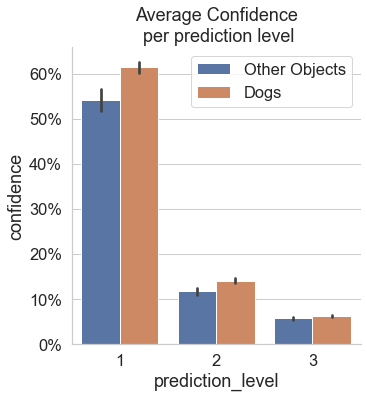

In [118]:
sns.color_palette("muted")
sns.set_theme(style="whitegrid",font_scale=1.5)

ax = sns.catplot(x='prediction_level',y='confidence',data=df_img,hue="breed" ,kind="bar",legend=False)
plt.title('Average Confidence\n per prediction level')

for axis in ax.axes.flat:
    axis.yaxis.set_major_formatter(mtick.PercentFormatter(1))

L=plt.legend()
L.get_texts()[0].set_text('Other Objects')
L.get_texts()[1].set_text('Dogs')
plt.show()

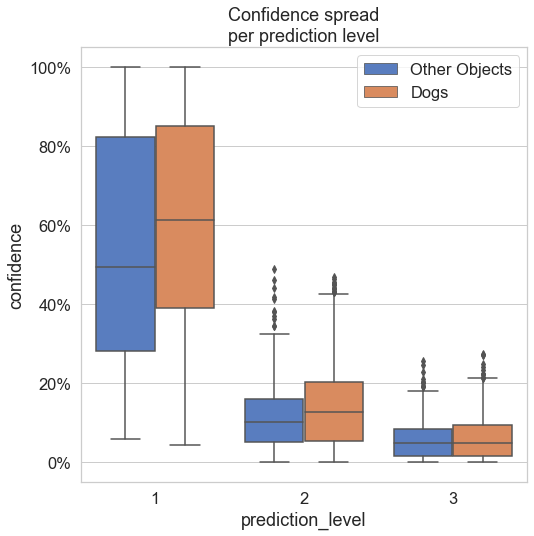

In [58]:
plt.figure(figsize=(8,8))

ax = sns.boxplot(x='prediction_level',y='confidence',hue='breed',palette="muted",data=df_img)
plt.title("Confidence spread\nper prediction level")
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
L=plt.legend()
L.get_texts()[0].set_text('Other Objects')
L.get_texts()[1].set_text('Dogs')

plt.show()

Comparing the prediction levels capabilities of differentiating between breed of dogs and other objects.
Does prediction levels accuracy of differentiating between dogs and other objects.

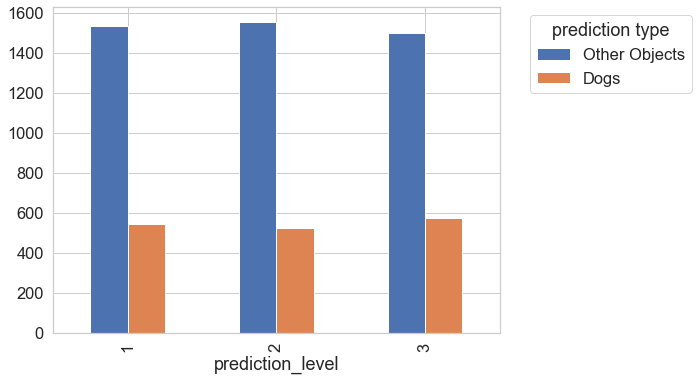

In [119]:
dogs = df_img[df_img['breed']==True].groupby('prediction_level')['breed'].value_counts()
not_dogs = df_img[df_img['breed']==False].groupby('prediction_level')['breed'].value_counts()

data = pd.merge(dogs,not_dogs,on='prediction_level')

data.plot(kind='bar',figsize=(8,6))
plt.legend(labels=['Other Objects','Dogs'],title='prediction type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

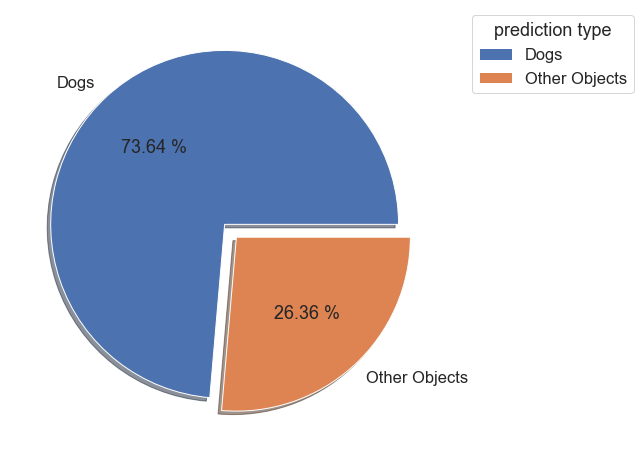

In [60]:
x = df_img.breed.value_counts()

explode = (0,0.1)
plt.figure(figsize=(8,8))

plt.pie(x, labels=['Dogs','Other Objects'], autopct='%.2f %%', explode=explode, shadow=True)

plt.legend(labels=['Dogs','Other Objects'],title='prediction type', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()


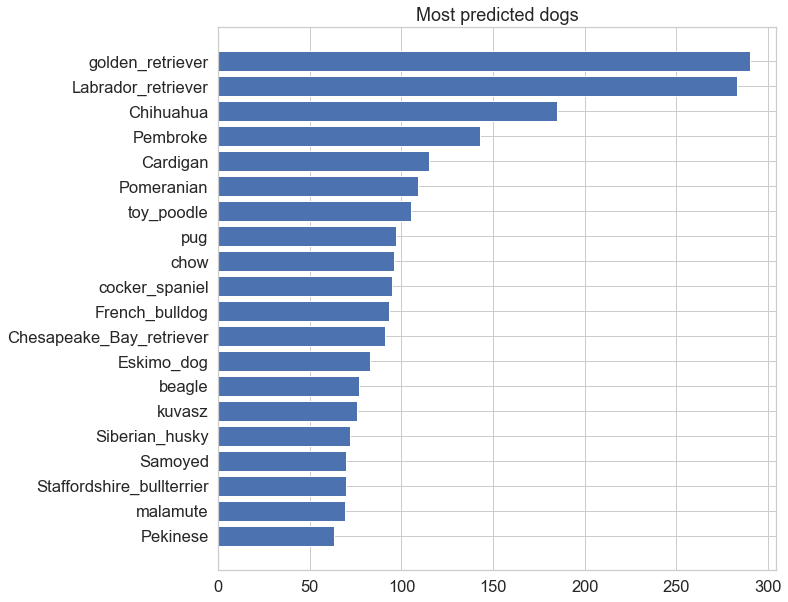

In [120]:
# top ten predicted breeds of dogs
data = df_img['prediction'].value_counts()[:20]

fig, ax = plt.subplots(figsize=(10,10))
ax.barh(data.keys(),data.values)
ax.invert_yaxis()
plt.title("Most predicted dogs")
plt.show()


### Conclusion

From the above analysis and visualization, it is clear that prediction level 1 can be considered the most reliable prediction level.

Hence, it's time to merge the data from the clean twitter archive with the prediction level 1 data.

In [121]:
# merge the prediction level 1 with the twitter archive data
right = df_img[df_img['prediction_level']==1][['tweet_id','prediction','breed']]

left = df_master[['tweet_id','timestamp','rating_numerator','dog_stage','retweet_count','favorite_count']]

df_merged = pd.merge(left,right,on='tweet_id')
df_merged.sample(3)

,tweet_id,timestamp,rating_numerator,dog_stage,retweet_count,favorite_count,prediction,breed
638,760290219849637889,2016-08-02 01:44:48+00:00,13,NaN,11231,26347,Old_English_sheepdog,True
454,793256262322548741,2016-11-01 01:00:05+00:00,12,NaN,8283,19919,basset,True
934,672256522047614977,2015-12-03 03:30:19+00:00,8,NaN,1421,2651,ostrich,False


## 4.2 Analyzing the twitter archive data and the prediction level 1

After merging the twitter archive with the prediction level 1 data as it was found to be the most reliable prediction, 
we try to answer the following questions:
    
    1. What's the most common rating that WeRateDogs gives?
    2. How does the WeRateDogs rating correlate with the interaction of the account(rating vs. retweets and fovorites)?
    3. How the social insteraction with the account progressed over time (retweets' and favorites' counts)?
    4. Which dog breeds are the most likable (most retweeted and most favorite)?
    5. How are the dog stages ratings compared?
    6. What's the interaction level for each dog stage?

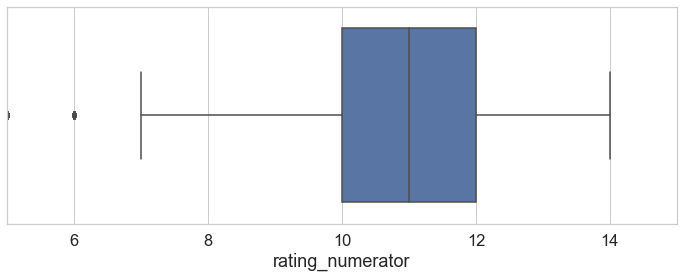

In [122]:
plt.figure(figsize=(12,4))

sns.boxplot(x=df_merged['rating_numerator'])

plt.axis(xmin=5,xmax=15)

plt.show()

Now we compare the different dog stages. We first create a pie chart to show how our data is distributed along different dog stages.

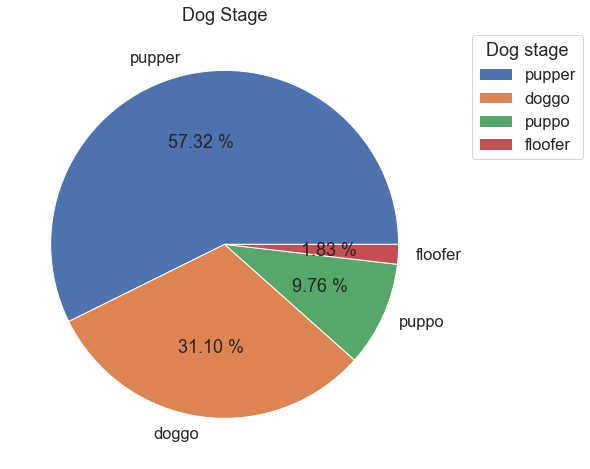

In [123]:
data = df_merged['dog_stage'].value_counts()

labels = data.keys()

plt.figure(figsize=(8,8))

plt.pie(data,labels=labels, autopct='%.2f %%')

plt.legend(title='Dog stage', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Dog Stage')
plt.show()

We compare the dog stages popularity by comparing the average retweets and favorites of each stage. 

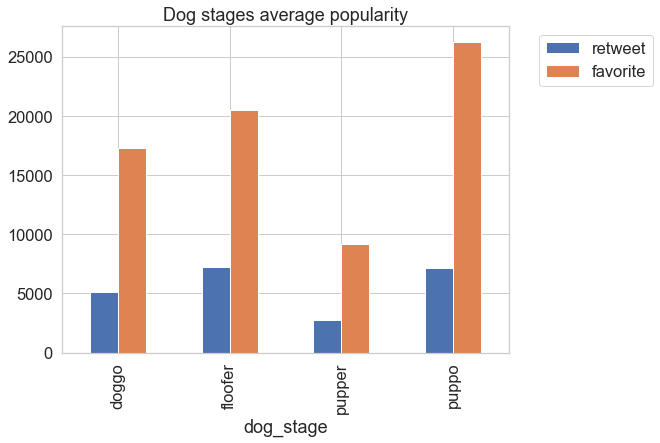

In [124]:
data = df_merged.groupby('dog_stage').mean()[['retweet_count','favorite_count']]


data.plot(kind='bar',figsize=(8,6))

plt.title('Dog stages average popularity')

plt.legend(labels=['retweet','favorite'],title='', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

we compare the dog stages ratings by plotting the average rating given by WeRateDogs for each stage.

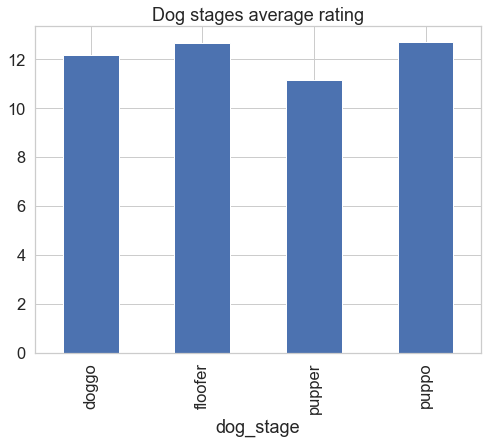

In [125]:
data = df_merged.groupby('dog_stage').mean()[['rating_numerator']]

data.plot(kind='bar',figsize=(8,6),legend=False)

plt.title('Dog stages average rating')

plt.show()

Comparing Favorite dogs with the account ratings to find the most rating the followers agree with.

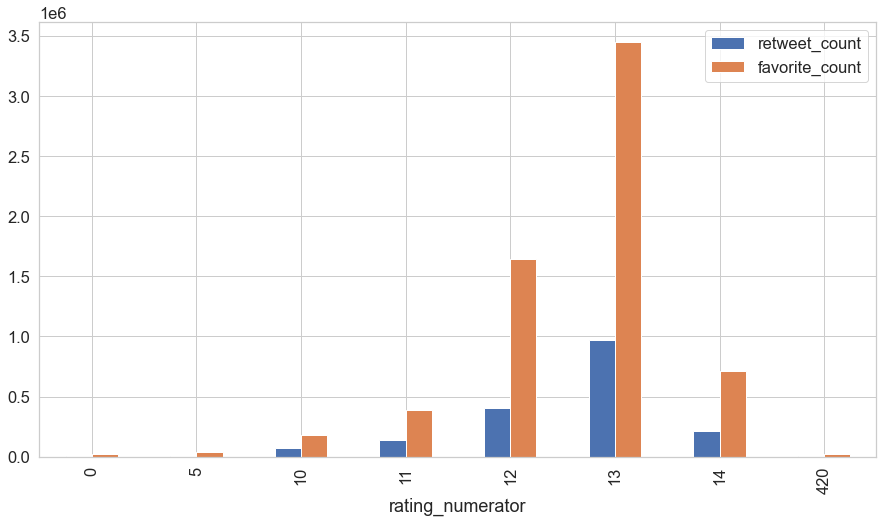

In [126]:
top_dogs = df_merged[df_merged['favorite_count'] > 20000]

data = top_dogs.groupby('rating_numerator').sum()[['retweet_count','favorite_count']]

data.plot(kind='bar',figsize=(15,8))

plt.show()

We analyze the account performance over time by plotting the retweet counts and the favorites counts  among months. As there was a big gap between the second half of 2015 and the first half of 2016, only a continuous portion of the data was taken into consideration for better visualization.

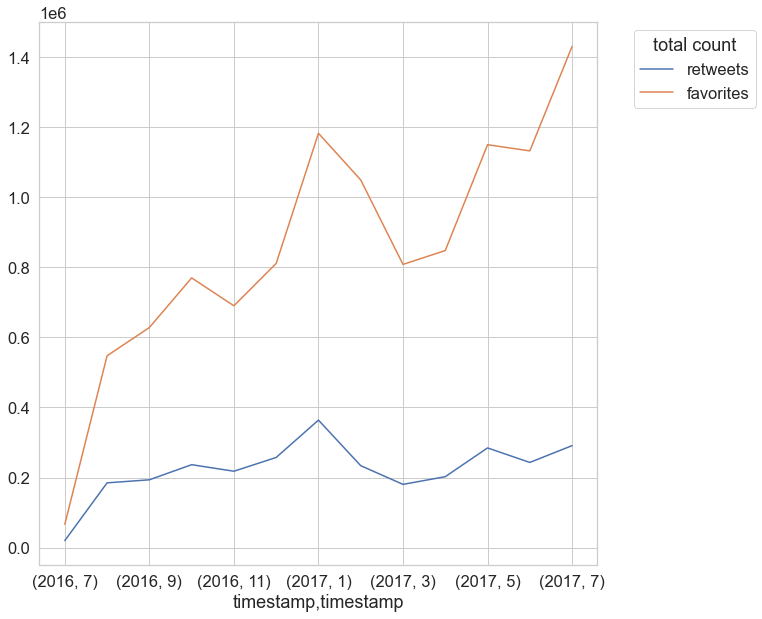

In [127]:
df_merged['timestamp'] = pd.to_datetime(df_merged['timestamp'])

data = df_merged.groupby([(df_merged['timestamp'].dt.year),(df_merged['timestamp'].dt.month)]).sum()

data[['retweet_count','favorite_count']][2:-1].plot(kind='line',figsize=(10,10))

plt.legend(labels=['retweets','favorites'],title='total count', bbox_to_anchor=(1.05, 1), loc='upper left')


plt.show()

We find the top rated breed of dogs by calculating the mean rating given by WeRateDogs for each breed.

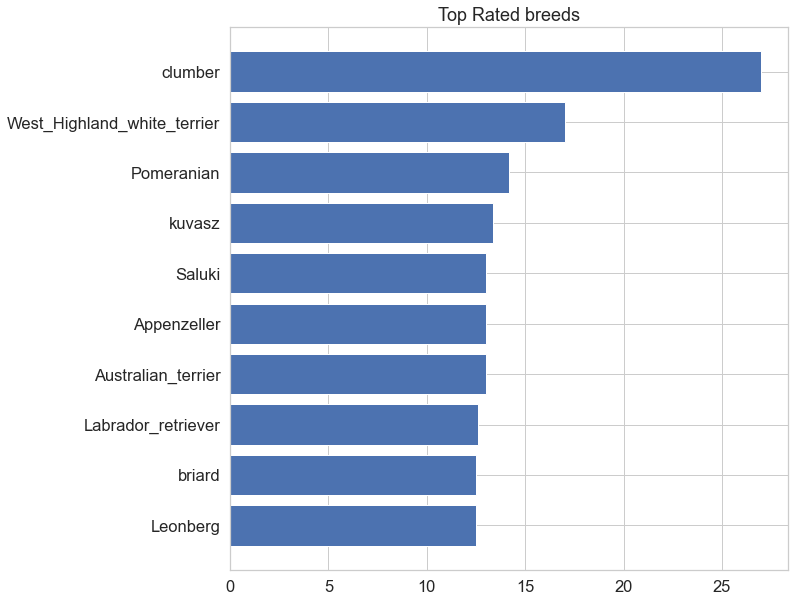

In [128]:
# top rated breeds of dogs
only_dogs = df_merged[df_merged['breed']==True]
rating = only_dogs.groupby('prediction').mean().sort_values(by='rating_numerator',ascending=False)

data = rating['rating_numerator'][:10]
fig, ax = plt.subplots(figsize=(10,10))
ax.barh(data.keys(),data.values)
ax.invert_yaxis()
plt.title('Top Rated breeds')
plt.show()


We find the most retweeted breed of dogs by calculating the mean retweet count for each breed.

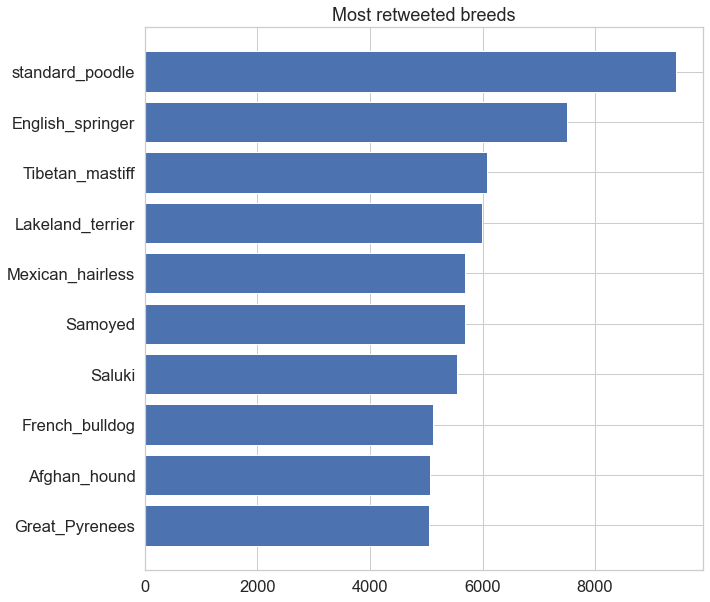

In [129]:
# top retweeted breeds of dogs
only_dogs = df_merged[df_merged['breed']==True]
rating = only_dogs.groupby('prediction').mean().sort_values(by='retweet_count',ascending=False)

data = rating['retweet_count'][:10]
fig, ax = plt.subplots(figsize=(10,10))
ax.barh(data.keys(),data.values)
ax.invert_yaxis()
plt.title('Most retweeted breeds')
plt.show()

We find the Most favorited breed of dogs by calculating the mean facorite count for each breed.

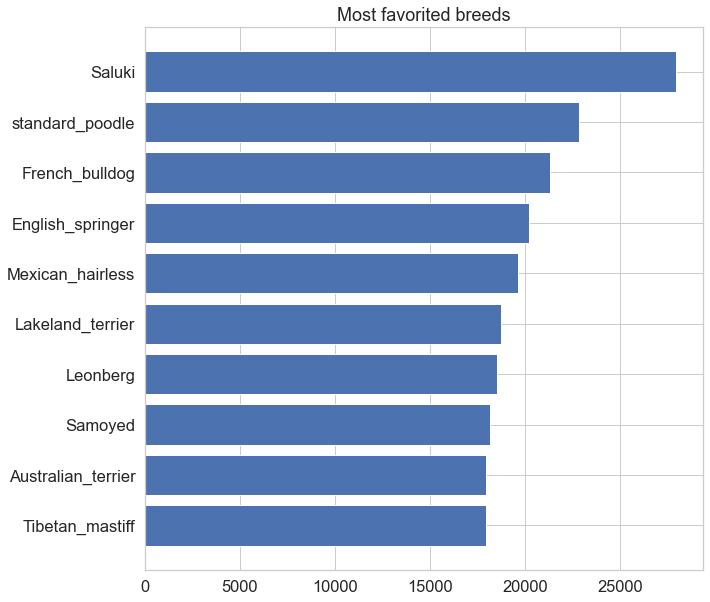

In [130]:
# top favorite breeds of dogs
only_dogs = df_merged[df_merged['breed']==True]
rating = only_dogs.groupby('prediction').mean().sort_values(by='favorite_count',ascending=False)

data = rating['favorite_count'][:10]
fig, ax = plt.subplots(figsize=(10,10))
ax.barh(data.keys(),data.values)
ax.invert_yaxis()
plt.title('Most favorited breeds')
plt.show()

### Conclusion

From the above visualizations and analysis, we can now try to answer the questions we posed earlier:
    
    1. What's the most common rating that WeRateDogs gives?
        The most common rating given by WeRateDogs is 12
    2. How does the WeRateDogs rating correlate with the interaction of the account(rating vs. retweets and fovorites)?
        rating of 13 which is higher than the usual rating the account gives (12) gets the most retweets and favorites.
    3. How the social interaction with the account progressed over time (retweets' and favorites' counts)?
        The interaction has progressed over time. The retweet rate look somewhat stable. However the favorite count had a very high slope.
    4. Which dog breeds are the most likable (most retweeted and most favorite)?
        - most retweeted: standard poodle
        - most favorite: Saluki
    5. How are the dog stages ratings compared?
        There's no big difference between the average ratings of different dog stages
    6. What's the interaction level for each dog stage?
        puppo seems to by the most favorited stage. then comes doggo and floofer. however, pupper seems to be the least popular.